<a href="https://colab.research.google.com/github/Edwina-Yeo/LTCC-Math-Bio/blob/main/Matched_Asymptotics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.special import jv as besselj



# Section 2: Bacterial swimming dynamics:


In this notebook we will evalutate the solution of the bacterial dynamics derived using method of multiple scale. We consider a bacteria which swims at a fixed speed $V$, the swimmer has a prefered angle $\Phi$ at which it swims but it oscillates rapidly around this preferred angle.

This is an example of a system in which: we have periodic fast dynamics and non-periodic slow dynamics.


**Literature:**
* 2D yawing of spheroids: Walker BJ, Ishimoto, K, Gaffney, EA, Moreau, C, Dalwadi, MP. Physical Review Fluids (2022), 7(2): 023101.
*  Method of multiple scales notes - see e.g. Chapter 11 of Bender & Orszag



Full Model

1.  $\frac{dx}{dt}=Vcos(\theta) $

2.  $\frac{dx}{dt}=Vcos(\theta) $

3. $\theta=1+Acos(\omega t) $

We have $\omega\gg1$ so that the angle oscillations are fast.


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e-02 ...  9.990e+00  1.000e+01]
        y: [[ 5.403e-01  5.453e-01 ...  4.649e+00  4.658e+00]
            [ 8.415e-01  8.502e-01 ...  7.275e+00  7.279e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 902
     njev: 0
      nlu: 0


Text(0, 0.5, 'y')

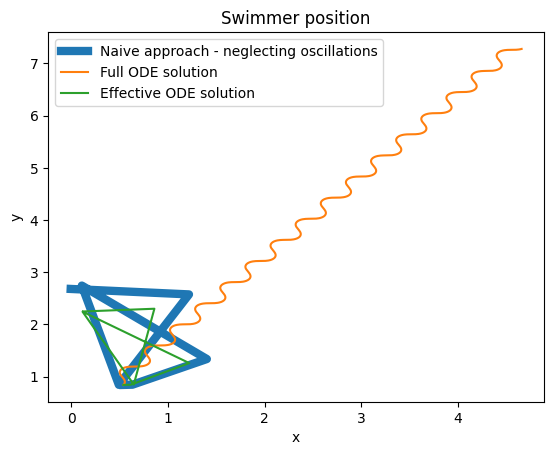

In [34]:
# Model parameters
A = 1  # Amplitude of angle oscillations
omega = 10  # Timescale of swimmer orientation oscillations - must be large
V = 1  # Swimmer speed

# Define the effective and full ODE functions
def effective(t,y):
    return [V * np.cos(t), V * np.sin(t)]

def full(t,y):
    # print(omega)
    A = 1  # Amplitude of angle oscillations
    omega = 10  # Timescale of swimmer orientation oscillations - must be large
    V = 1  # Swimmer speed
    return [V * np.cos(1 + A * np.sin(omega * t)), V * np.sin(1 + A * np.sin(omega * t))]

# Naive approach where we neglect angle oscillations
t = np.linspace(0, 10, 1000)

sol_naive =  solve_ivp(effective, [0,10], [np.cos(1), np.sin(1)])
r_naive=sol_naive.y
# Solve the ODE numerically
sol = solve_ivp(full,[0,10], [np.cos(1), np.sin(1)],t_eval=t,rtol=1e-8)
r=sol.y
print(sol)

# Solve the dynamics of the swimmers using effective model
V=V * besselj(0, A)
sol_eff = solve_ivp(effective, [0,10], [np.cos(1), np.sin(1)])
r_eff=sol_eff.y

# Plotting
plt.figure()

# plt.subplot(1, 2, 1)
plt.plot(r_naive[ 0,:], r_naive[1,:], linewidth=6, label='Naive approach - neglecting oscillations')
plt.plot(r[0,:], r[ 1,:], label='Full ODE solution')
plt.plot(r_eff[0,:], r_eff[1,:], label='Effective ODE solution')
plt.legend()
plt.title('Swimmer position')
plt.xlabel('x')
plt.ylabel('y')

# plt.subplot(1, 2, 2)
# plt.plot(t, np.ones_like(t), linewidth=6, label='Constant angle')
# plt.plot(t, 1 + A * np.sin(omega * t), label='Oscillating angle')
# plt.plot(t, np.ones_like(t), label='Constant angle')
# plt.ylabel('Angle')
# plt.xlabel('t')
# plt.title('Swimmer angle')
# plt.show()